# Assignment-03-Q2 (Hypothesis Testing)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data=pd.read_csv('C:/Users/Payod/Downloads/LabTAT.csv')
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [3]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [4]:
data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [5]:
data[data.duplicated()].shape

(0, 4)

# DATA TYPE

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
Laboratory 1    120 non-null float64
Laboratory 2    120 non-null float64
Laboratory 3    120 non-null float64
Laboratory 4    120 non-null float64
dtypes: float64(4)
memory usage: 3.8 KB


# PLOTTING DATA

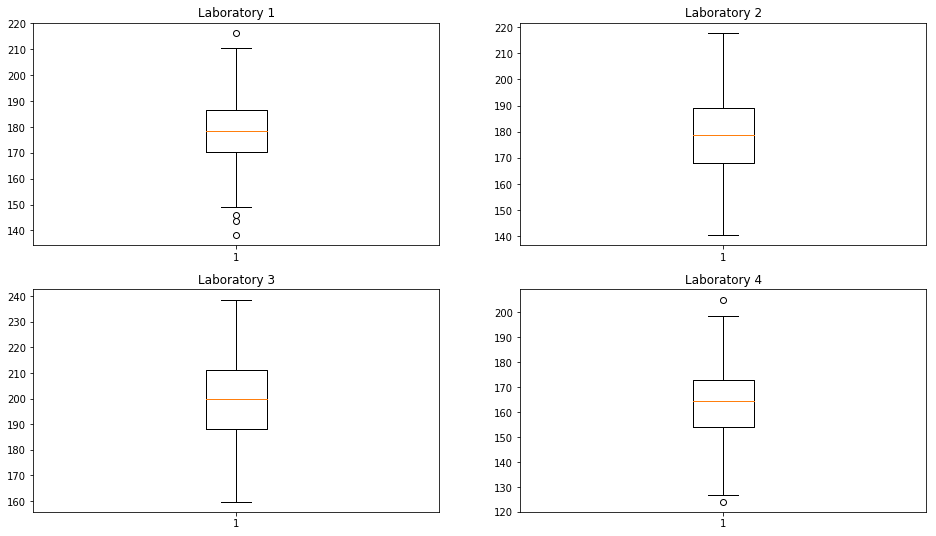

In [9]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

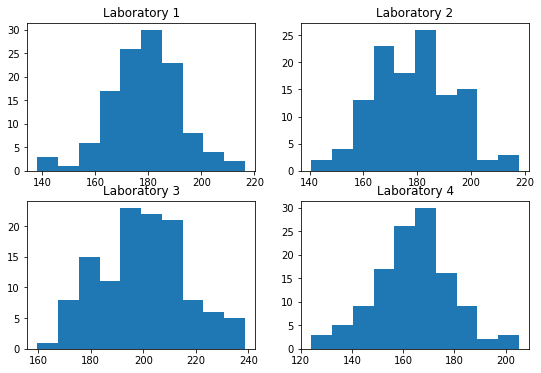

In [10]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

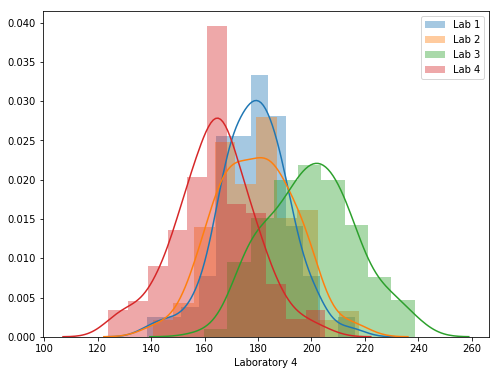

In [12]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(data['Laboratory 1'], kde = True)
sns.distplot(data['Laboratory 2'],hist = True)
sns.distplot(data['Laboratory 3'],hist = True)
sns.distplot(data['Laboratory 4'],hist = True)
plt.legend(labels)

# Transformations

Text(0.5, 1.0, 'Cube Root')

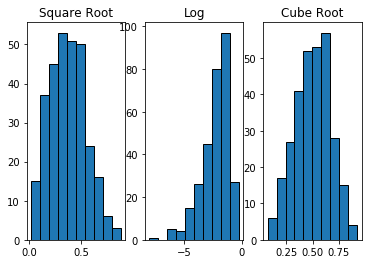

In [4]:
data_log = np.log(data)
data_log1 = np.sqrt(data)
data_log2 = np.cbrt(data)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(data_log1, edgecolor='black')
axs[0].set_title('Square Root')
axs[1].hist(data_log, edgecolor='black')
axs[1].set_title('Log')
axs[2].hist(data_log2, edgecolor='black')
axs[2].set_title('Cube Root')

# For checking Normal Distributions is followed or not by using Q-Q Plot

C:\Users\Payod\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


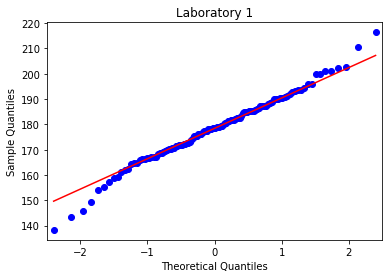

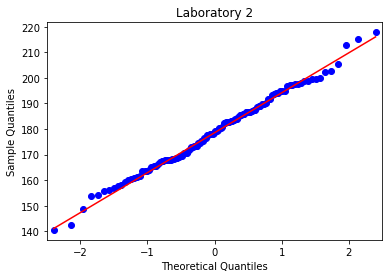

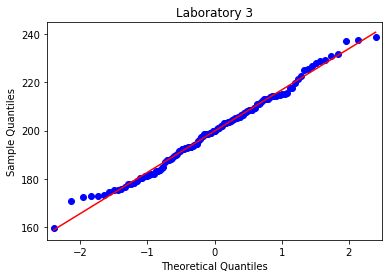

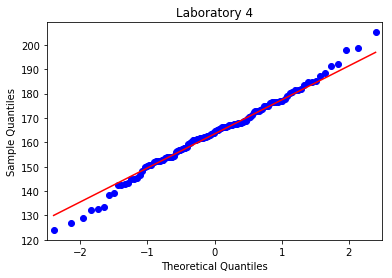

In [16]:
sm.qqplot(data['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(data['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(data['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(data['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

# HYPOTHESIS TESTING FROM ABOVE INCIDENCES USING T-STATISTICS

In [17]:
test_statistic , p_value = stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


BY COMPARING p_value with Alpha (SIGNIFICANCE LEVEL)
CHECKING NULl HYPOTHESIS 
p_value not equal to alpha, then failed to reject Null Hypothesis due to no evidenece
p_value equal to alpha, then Null Hypothesis Succesfully rejected

Since ALPHA is 5%=0.05

In [19]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print(' Null Hypothesis succesfully rejected, there is a significance difference between TAT of reports of the laboratories')
else:
    print('Failed to reject Null hypothesis due to no evidenece')

Significnace=0.050, p=0.000
 Null Hypothesis succesfully rejected, there is a significance difference between TAT of reports of the laboratories


# No significant difference between the two samples